In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

plt.style.use('bmh')

In [2]:
#importing dataset
df = pd.read_csv('NAS.csv')
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,2003-12-24,NaN,NaN,NaN,NaN,NaN,NaN
5,2003-12-25,NaN,NaN,NaN,NaN,NaN,NaN
6,2003-12-26,NaN,NaN,NaN,NaN,NaN,NaN
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0
8,2003-12-30,17.425800,17.882900,17.425800,17.711500,17.711500,67298.0
9,2003-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#dropping all "NaN" cells
df.dropna(axis = 0, how = 'any', inplace = True)
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0
8,2003-12-30,17.425800,17.882900,17.425800,17.711500,17.711500,67298.0
11,2004-01-02,17.940001,18.054300,17.768600,17.768600,17.768600,322923.0
12,2004-01-05,18.054300,18.054300,17.711500,17.711500,17.711500,182782.0
13,2004-01-06,17.940001,17.997101,17.597200,17.597200,17.597200,300054.0
14,2004-01-07,17.425800,17.711500,17.140100,17.140100,17.140100,189937.0


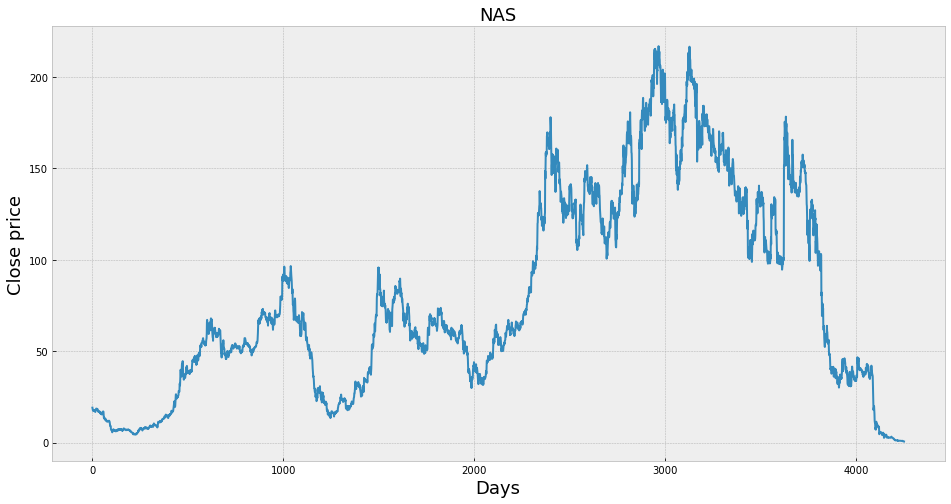

In [4]:
#visualizing data
plt.figure(figsize=(16,8))
plt.title('NAS', fontsize = 18)
plt.xlabel('Days', fontsize= 18)
plt.ylabel('Close price', fontsize = 18)
plt.plot(df['Close'])
plt.show()

In [5]:
#consentrating on only Close price
df = df[['Close']]
df.head(20)

,Close
0,19.139799
1,18.454201
2,18.054300
3,17.425800
7,17.254400
8,17.711500
11,17.768600
12,17.711500
13,17.597200
14,17.140100


In [6]:
#predicting for 500 days into the future
future_days = 500
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail()

,Close,Prediction
4248,0.6768,NaN
4249,0.6006,NaN
4250,0.6260,NaN
4251,0.6050,NaN
4252,0.6106,NaN


In [7]:
#creating feature dataset
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[ 19.139799]
 [ 18.454201]
 [ 18.0543  ]
 ...
 [116.053001]
 [114.443001]
 [115.017998]]


In [8]:
#creating target data
y = np.array(df['Prediction'])[:-future_days]
print(y)

[39.565102 38.850899 40.707802 ...  0.626     0.605     0.6106  ]


In [9]:
#splitting data into 75% training and 25% testing data sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [10]:
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[171.572998],
       [171.401001],
       [167.802002],
       [164.544998],
       [162.830994],
       [161.973999],
       [162.317001],
       [159.175003],
       [161.003006],
       [158.375   ],
       [160.259995],
       [158.317993],
       [159.574005],
       [159.688995],
       [153.404007],
       [155.975006],
       [156.145996],
       [153.518005],
       [154.147003],
       [154.604004],
       [155.860992],
       [153.233002],
       [152.660995],
       [151.860992],
       [150.319   ],
       [150.261993],
       [150.604004],
       [148.776001],
       [152.261002],
       [152.089996],
       [149.175995],
       [148.033005],
       [170.257996],
       [169.686996],
       [159.973999],
       [161.688004],
       [162.660004],
       [160.716995],
       [158.945999],
       [157.403   ],
       [160.431   ],
       [162.488007],
       [160.546005],
       [161.746002],
       [159.516998],
       [160.259995],
       [163.401993],
       [161.9

In [11]:
#using Decision Tree Regressor
tree = DecisionTreeRegressor().fit(x_train, y_train)
tree_prediction = tree.predict(x_future)
print( tree_prediction )
print()

[115.708      140.3619996  178.942993   109.266998   130.812668
 101.5429995  110.474899   199.453995    91.669401   132.435997
 120.548668   122.724998   102.8983995  123.644997   128.244995
 116.3700025  132.214005    95.666496   132.559006   183.856003
 126.404999   130.201004   127.669998   167.1434975  154.982998
 163.9874955  113.378998   116.456001   117.088997   117.950996
 124.565002   124.794998   124.346003   161.97833233 104.64630125
 127.095001   122.033997   198.253998   103.775002   145.851002
 142.852997   111.568001   125.9376515  111.4384995  119.043999
 120.548668   137.914501   108.893997   111.4384995    4.479
  99.5141985   99.749603   141.932999   102.9346005  137.370532
 103.373001    74.042999    95.666496   142.0287555   76.7759475
 155.02413433 187.856003    95.666496   114.553001   102.194
 102.194      103.170998   116.3700025  104.64630125 102.8983995
 141.056301   183.856003    75.336998    74.042999   130.812649
   1.054      126.322998     1.263       6

<ipython-input-13-b73445184642>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


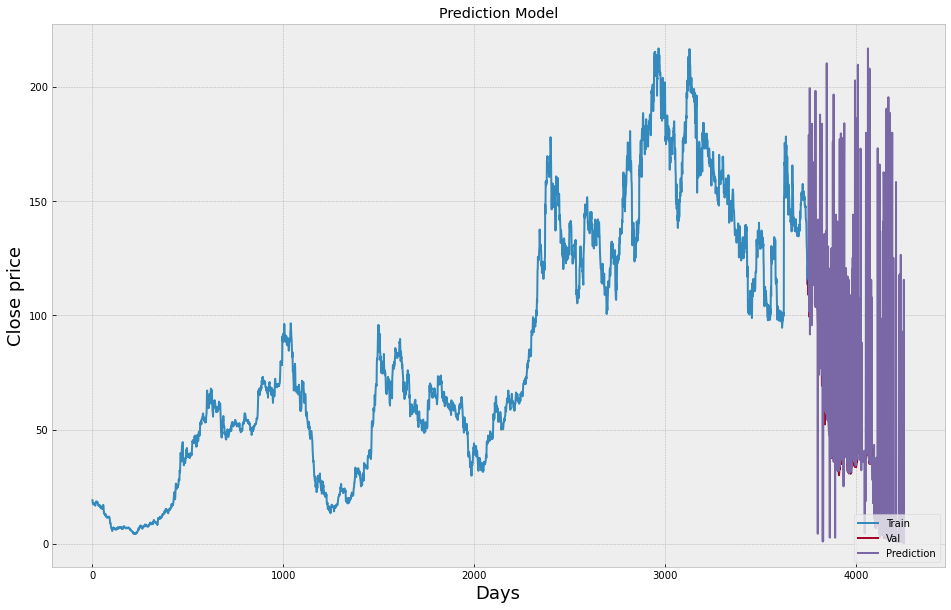

In [13]:
#Visualizing the data , i see now that it is pretty difficult to compare with the actual valid data
#Therfore I would reccomend to compare this graph with the original one above
predictions = tree_prediction
#Plot the data
valid =  df[X.shape[0]:]
valid['Predictions'] = predictions 
plt.figure(figsize=(16,10))
plt.title('Prediction Model')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close price',fontsize=18)
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Prediction' ], loc ='lower right')
plt.show()